## Propagación hacia atrás

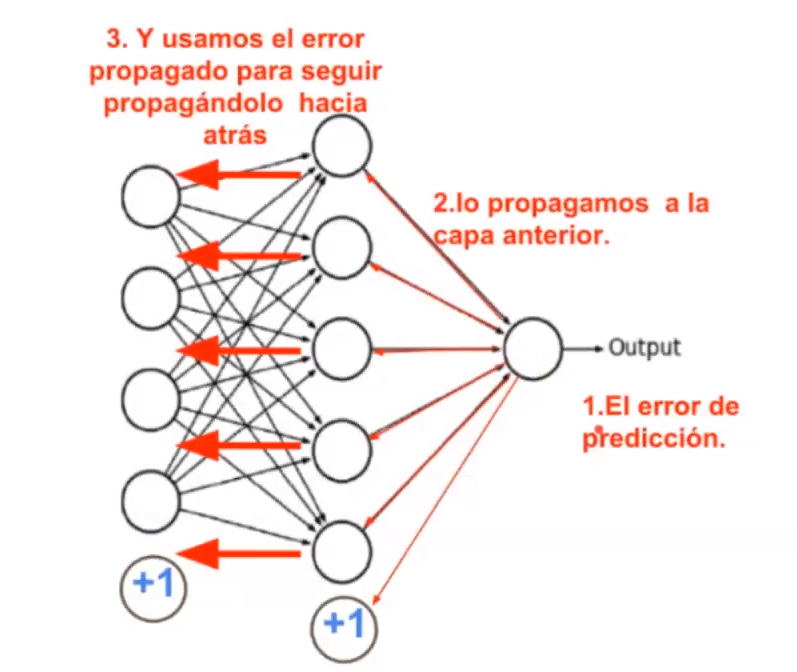

#### Calculo de error de predicción

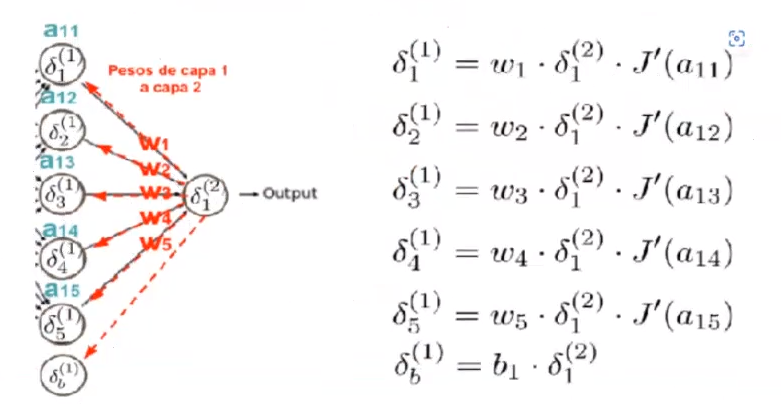

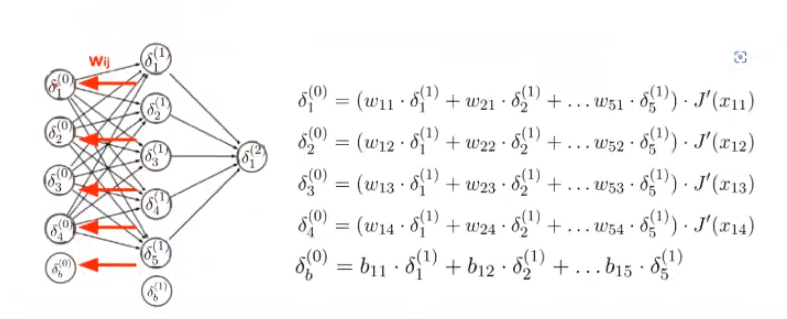

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
data=load_breast_cancer()

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(7,7)

# Función identidad:  $$ f(x) = x $$
# Función Sigmoide:  $$ f(x) = 1/({1+e^{-x}}) $$

# Obtención de las gráficas - Taller 09

In [4]:
x = np.linspace(-10, 10, 100)

In [5]:
def fn_identidad(x, derivada=False):
    if derivada:
        return np.ones(x.shape)
    return x

def fn_sigmoide(x, derivada=False):
    if derivada:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [6]:
# Calcular los valores de las funciones y el error para cada valor de x
identidad = fn_identidad(x)
sigmoide = fn_sigmoide(x)

<IPython.core.display.Javascript object>


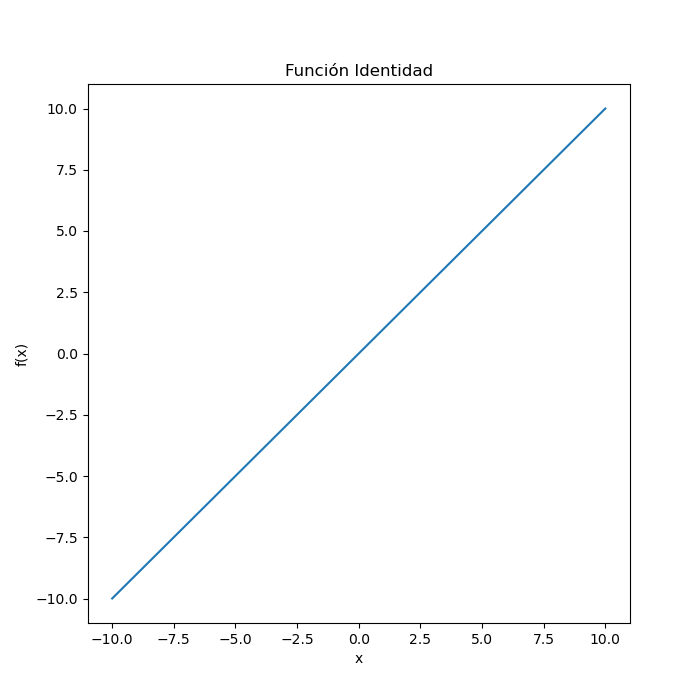

<IPython.core.display.Javascript object>


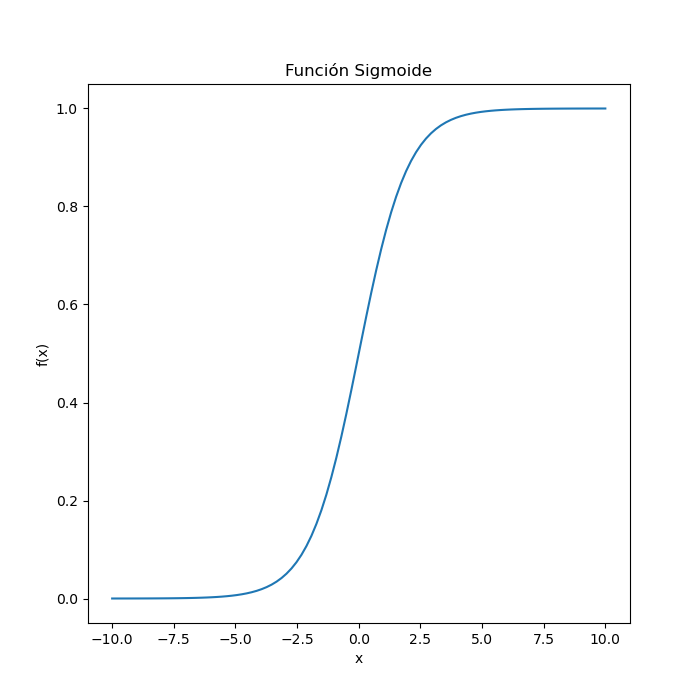

In [7]:
# Graficar la función identidad
plt.figure()
plt.plot(x, identidad)
plt.title("Función Identidad")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Graficar la función sigmoide
plt.figure()
plt.plot(x, sigmoide)
plt.title("Función Sigmoide")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## Formula para calculo de error

In [8]:
def error_logloss(y_pred,y):
    p = np.clip(y_pred,1e-15,1 - 1e-15)
    if y == 1:
        return -np.log(p)
    else:
        return -np.log(1-p)

In [9]:
np.clip(0.3,1e-15,1 - 1e-15)

0.3

In [10]:
logloss = [error_logloss(y_pred, 1) for y_pred in np.clip(x, 1e-15, 1 - 1e-15)]

<IPython.core.display.Javascript object>


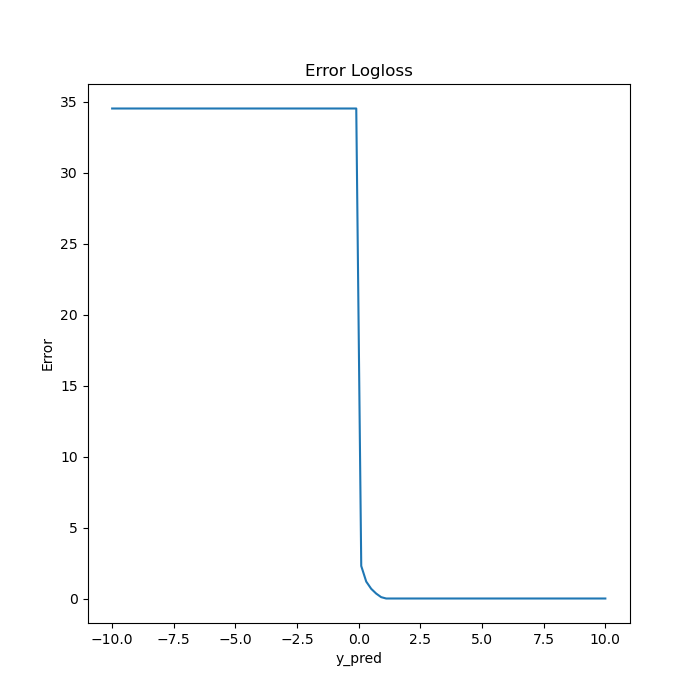

In [11]:
# Graficar el error logloss
plt.figure()
plt.plot(x, logloss)
plt.title("Error Logloss")
plt.xlabel("y_pred")
plt.ylabel("Error")
plt.show()

In [12]:
class Layer:
    def __init__(self,n_unidades,fn_activacion,bias=True):
        self.n_unidades=n_unidades
        self.fn_activacion=fn_activacion
        self.dim_output=n_unidades
        self.bias=bias
        self.dimensiones='no generada'
        self.w=None
    
    def __repr__(self):
        return """
        Capa {}. dimensiones = {}.
        pesos: {}
        """.format(self.nombre,self.dimensiones,self.w)
    
    def generar_pesos(self,dim_output_anterior):
        if self.bias:
            self.dimensiones=(self.n_unidades,dim_output_anterior+1)
        else:
            self.dimensiones=(self.n_unidades,dim_output_anterior)
        self.w=np.random.random(self.dimensiones) 
        
    def add_bias(self,x):
        if not self.bias:
            return x
        x_con_bias_1d=np.append(1,x)
        return x_con_bias_1d.reshape(x_con_bias_1d.shape[0],1)
    
    def activar(self,x):
        x_con_bias_2d=self.add_bias(x)
        return self.fn_activacion(self.w @ x_con_bias_2d )

    def calcular_delta(self,producto_capa,output_capa):
        return producto_capa*self.fn_activacion(output_capa,derivada=True)

- Capa entrada : conecta con el input
- Capa oculta: trabaja con la función de activación
- Capa de salida: traducir output de la antepenultima variable

In [13]:
class InputLayer(Layer):
    nombre = 'entrada'
    
    def generar_pesos(self):
        pass
    
    def activar(self,x):
        return x 
    
class HiddenLayer(Layer):
    nombre='oculta'
    
class OutputLayer(Layer):
    nombre='salida'

In [14]:
class redNeuronalR:
    def __init__(self,ratio_aprendizaje,fn_error):
        self.layers=[]
        self.ratio_aprendizaje=ratio_aprendizaje
        self.fn_error=fn_error

    def add_layer(self, layer):
        if layer.nombre=='entrada':
            layer.generar_pesos()
        else:
            layer.generar_pesos(self.layers[-1].dim_output)
        self.layers.append(layer) 
        
    def __repr__(self):
        info_red=""
        for layer in self.layers:
            info_red +="\nCapa: {} N° unidades: {}".format(layer.nombre,layer.n_unidades)
        return info_red
    
    def forward(self,x):
        for layer in self.layers:
            layer.input=layer.add_bias(x).T
            x=layer.activar(x)
            layer.output=x
        return x
    
    def calcular_error_prediccion(self,y_pred,y):
        return self.fn_error(y_pred,y)
    
    def backward(self,y_pred,y):
        delta_capa=self.calcular_error_prediccion(y_pred,y)
        for layer in reversed(self.layers):
            if layer.nombre=='entrada':
                continue
            if layer.nombre=='salida':
                producto_capa=delta_capa @ layer.w
            else:
                producto_capa=delta_capa[:,1:] @ layer.w
            delta_capa=layer.calcular_delta(producto_capa,layer.output)
            layer.delta=delta_capa

In [15]:
class redNeuronalR:
    def __init__(self,ratio_aprendizaje,fn_error):
        self.layers=[]
        self.ratio_aprendizaje=ratio_aprendizaje
        self.fn_error=fn_error

    def add_layer(self, layer):
        if layer.nombre=='entrada':
            layer.generar_pesos()
        else:
            layer.generar_pesos(self.layers[-1].dim_output)
        self.layers.append(layer) 
        
    def __repr__(self):
        info_red=""
        for layer in self.layers:
            info_red +="\nCapa: {} N° unidades: {}".format(layer.nombre,layer.n_unidades)
        return info_red
    
    def forward(self,x):
        for layer in self.layers:
            layer.input=layer.add_bias(x).T
            x=layer.activar(x)
            layer.output=x
        return x
    
    def calcular_error_prediccion(self,y_pred,y):
        return self.fn_error(y_pred,y)
    
    def backward(self,y_pred,y):
        delta_capa=self.calcular_error_prediccion(y_pred,y)
        for layer in reversed(self.layers):
            if layer.nombre=='entrada':
                continue
            if layer.nombre=='salida':
                producto_capa=delta_capa @ layer.w
            else:
                producto_capa=delta_capa[:,1:] @ layer.w
            delta_capa=layer.calcular_delta(producto_capa,layer.output)
            layer.delta=delta_capa
            
    def actualizar_pesos(self):
        """
        Actualiza pesos mediante el descenso de gradiente
        """
        for layer in self.layers[1:]:
            layer.w=layer.w - self.ratio_aprendizaje *layer.delta * layer.input
           
    def aprendizaje(self,x,y):
        """
        Funcion principal para entrenar la red
        """
        y_pred=self.forward(x)
        self.backward(y_pred,y)
        self.actualizar_pesos()
        error_prediccion=self.calcular_error_prediccion(y_pred,y)
        return error_prediccion
    
    def predict_proba(self,x):
        return forward(x)
    
    def predict(self,x):
        probabilidad=self.predict_proba(x)
        if probabilidad >=0.5:
            return 1
        else:
            return 0

### Usando las redes neuronales

In [16]:
n_input=4
n_oculta=5
n_output=1

RATIO_APRENDIZAJE=0.0001
N_ITERACIONES=1000

In [17]:
red_sigmoide = redNeuronalR(ratio_aprendizaje=RATIO_APRENDIZAJE,fn_error=error_logloss)

In [18]:
red_sigmoide.add_layer(InputLayer(n_input,bias=False,fn_activacion=fn_identidad))
red_sigmoide.add_layer(HiddenLayer(n_oculta,fn_activacion=fn_sigmoide))
red_sigmoide.add_layer(OutputLayer(n_output,fn_activacion=fn_sigmoide))

In [19]:
red_sigmoide.layers

[
         Capa entrada. dimensiones = no generada.
         pesos: None
         ,
 
         Capa oculta. dimensiones = (5, 5).
         pesos: [[0.79525653 0.93132231 0.55267451 0.47042376 0.5150298 ]
  [0.79407436 0.76986243 0.04462228 0.04637431 0.39285417]
  [0.16547919 0.00791907 0.69165996 0.97252228 0.0089799 ]
  [0.56139213 0.19154256 0.68916204 0.96485251 0.50498657]
  [0.95249683 0.49802625 0.08549293 0.46048145 0.14824175]]
         ,
 
         Capa salida. dimensiones = (1, 6).
         pesos: [[0.64835966 0.6999023  0.12322555 0.30609279 0.58303725 0.3426965 ]]
         ]

In [20]:
red_sigmoide.aprendizaje(x0,y0)#Optimizando el modelo

NameError: name 'x0' is not defined